<a href="https://colab.research.google.com/github/GUILLENJV/62f1ab79cc287b001f643389/blob/master/62f1ab79cc287b001f643389_clear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import xlrd
import base64
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [22]:
# carga los datos

df = pd.read_excel('62f1ab79cc287b001f643389_clear.xlsx') 
#df=pd.read_excel('/content/drive/MyDrive/627608bd25444d0a749fc1b2.xlsx',dtype=str)
#df=df.replace(np.nan,"0") 
#obj_df = df.select_dtypes(include=['object']).copy()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
#encoder=preprocessing.LabelEncoder()

#encoder_dict =defaultdict(LabelEncoder)
#labeled_df = df.apply(lambda x: encoder_dict[x.name].fit_transform(x))
#labeled_df = obj_df.apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [23]:
df

,campaign_id,landing_page_id,traffic_source_id,visitor_device_browser,visitor_device_hardware_family,visitor_device_hardware_model,visitor_device_hardware_vendor,visitor_device_os_family,visitor_device_os_vendor,visitor_device_os_version,...,visitor_geo_location_cityName,visitor_geo_location_connection_type,visitor_geo_location_countryCode,visitor_geo_location_isp,visitor_geo_location_regionName,visitor_tokens_adh,visitor_tokens_cadid,visitor_tokens_adi,converted_yes,converted_no
0,624542fb9a12e16cc0299a24,62566aa432b19a0164d802be,58939c5eeb1b39e23f2044bb,Mobile Safari,iPhone,iPhone,Apple,iOS,Apple,15.3.1,...,Other,Cable/DSL,US,Comcast Cable,Florida,reghelpgetsolarnocostapril,vc7LvqetL,solarpergola,0.0,1.0
1,6251b74940ddb049df0dfe50,62566aa432b19a0164d802be,58939c5eeb1b39e23f2044bb,Chrome,Emulator,Unknown,Unknown,Windows,Microsoft,10.0,...,Kelseyville,Cable/DSL,US,AT&T U-verse,California,reggovhelpgetsolarnocost,LrjwavC-W,solarpergola,0.0,1.0
2,6249fea1b92ef259586b8116,62566aa432b19a0164d802be,58939c5eeb1b39e23f2044bb,Safari,Macintosh,Macintosh,Apple,macOS,Apple,10.15.6,...,Antioch,Cable/DSL,US,Comcast Cable,Illinois,regproghelpgetsolarnocostapril,KnDIBegRz,solarpergola2,0.0,1.0
3,624542fb9a12e16cc0299a24,62566aa432b19a0164d802be,58939c5eeb1b39e23f2044bb,Mobile Safari,iPhone,iPhone,Apple,iOS,Apple,15.3.1,...,Los Angeles,Cellular,US,Verizon Wireless,Alabama,reggetsolarnocostapr,p1WEZSp1_,solarpergola2,0.0,1.0
4,624542fb9a12e16cc0299a24,62566aa432b19a0164d802be,58939c5eeb1b39e23f2044bb,Yandex.Browser for Android,Galaxy J3 Emerge,SM-J327VPP,Samsung,Android,Google,8.1,...,Naples,Cable/DSL,US,Comcast Cable,Florida,reghelpgetsolarnocostapril,vc7LvqetL,solarpergola,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,62522129906f5769bcfe37b5,62f1a645f4f6cb001aed258b,57ac89e0a38746122f4af882,Edge (Chromium) for Windows,Emulator,Unknown,Unknown,Windows,Microsoft,10.0,...,Other,Cable/DSL,US,Comcast Cable,Texas,regwillcoverowninzipcode,JebN7g3qg,blondejudge2,0.0,1.0
18401,625221af89418f743d9e21a8,62f1a645f4f6cb001aed258b,57ac89e0a38746122f4af882,Mobile Safari,iPhone,iPhone,Apple,iOS,Apple,15.6,...,San Jose,Corporate,US,Amazon.com,California,regwillcoverowninzipcode,WuSp0-mQk,blondejudge2,0.0,1.0
18402,62e7f5a58e5f15001b6ad469,62f1a645f4f6cb001aed258b,5e46d6787810b90011c91204,Mobile Safari,iPhone,iPhone,Apple,iOS,Apple,15.6,...,Peterborough,Cable/DSL,US,Comcast Cable,New Hampshire,regcovsolbattbackcity,4N30ZrVUO,tsbatout,0.0,1.0
18403,62ea9aa9601711001a69a7b7,62f1a645f4f6cb001aed258b,5e46d6787810b90011c91204,Mobile Safari,iPhone,iPhone,Apple,iOS,Apple,15.6,...,Pekin,Cable/DSL,US,Comcast Cable,Illinois,regcovsolbattbackcity,4N30ZrVUO,tsbatout,0.0,1.0


In [24]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)

In [5]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.5 MB/s 


In [25]:
import sweetviz as sv

In [26]:
# Generar el reporte
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


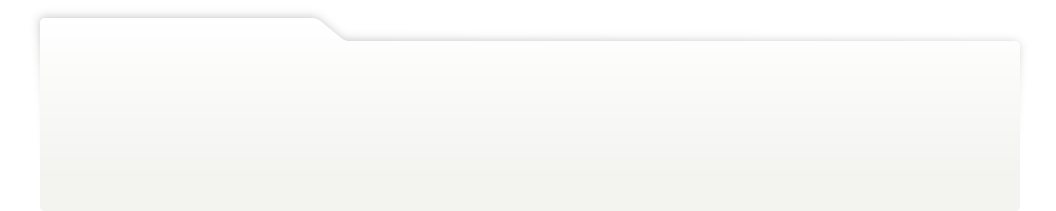
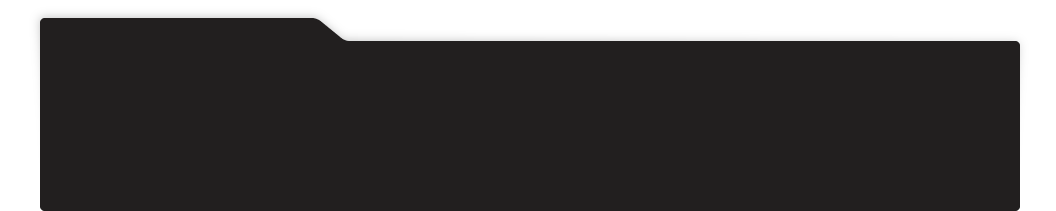
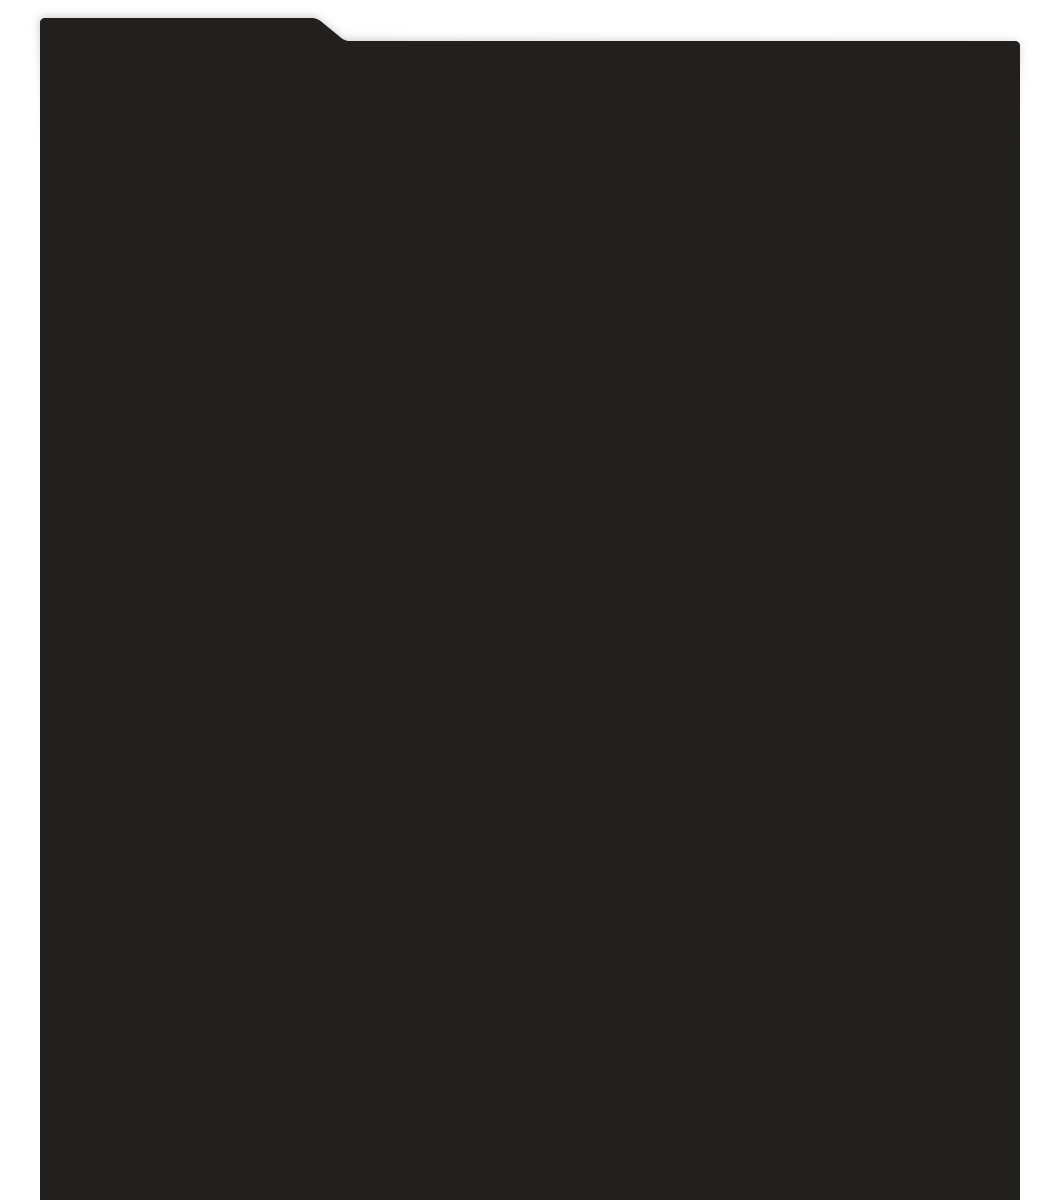
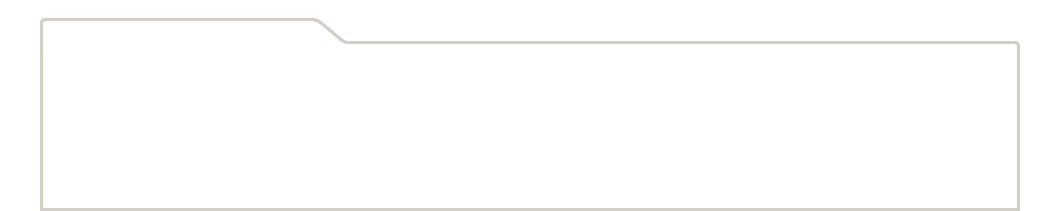
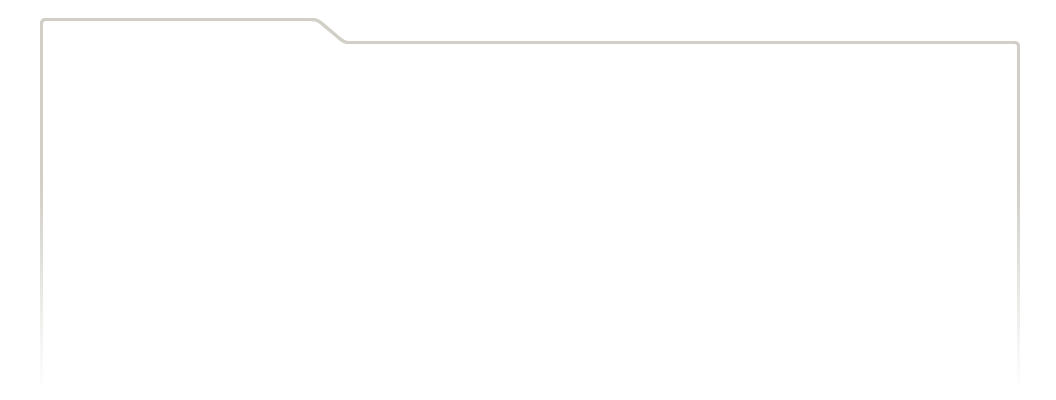
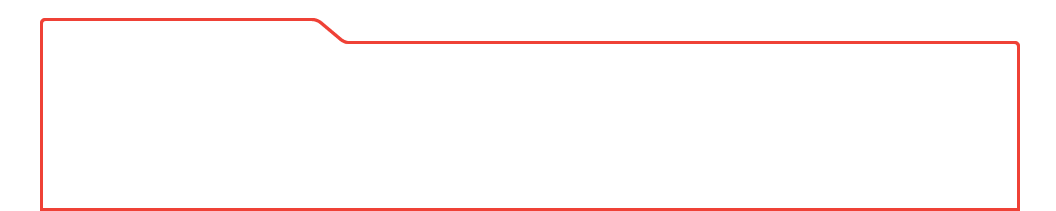
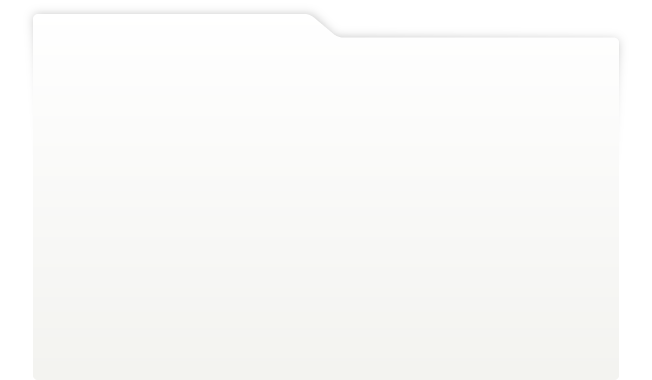
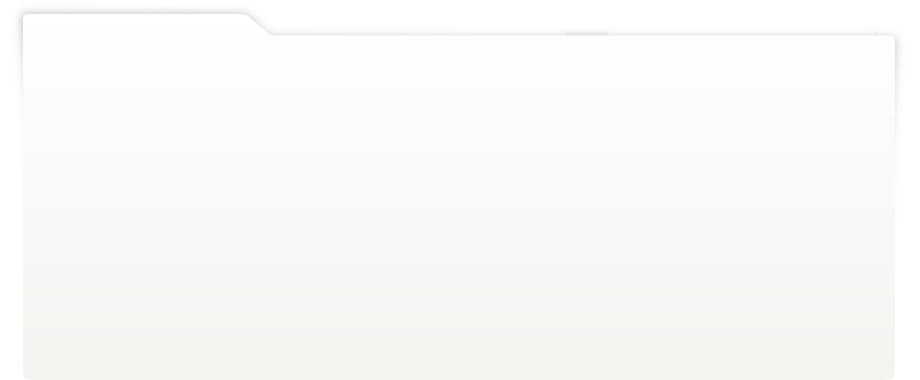
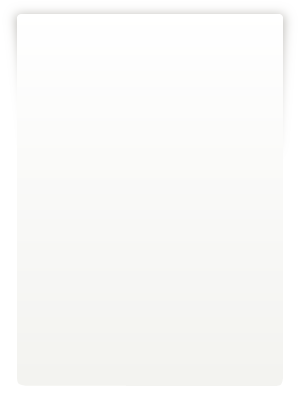
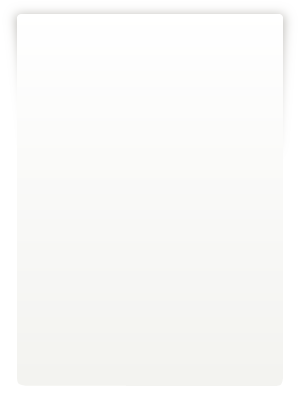
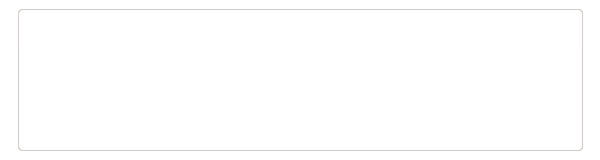
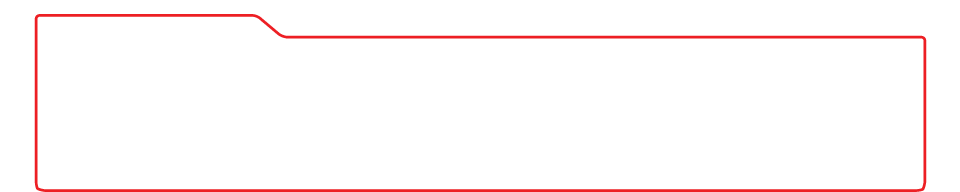
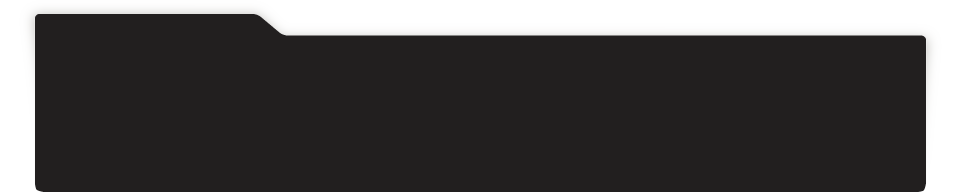
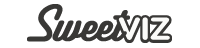
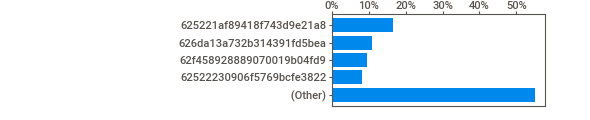
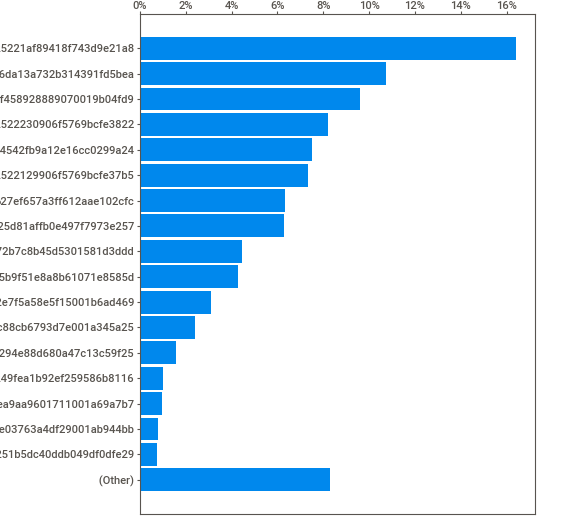
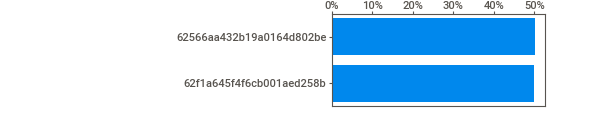
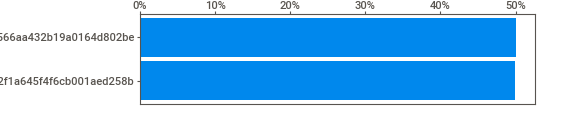
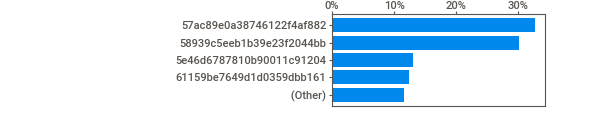
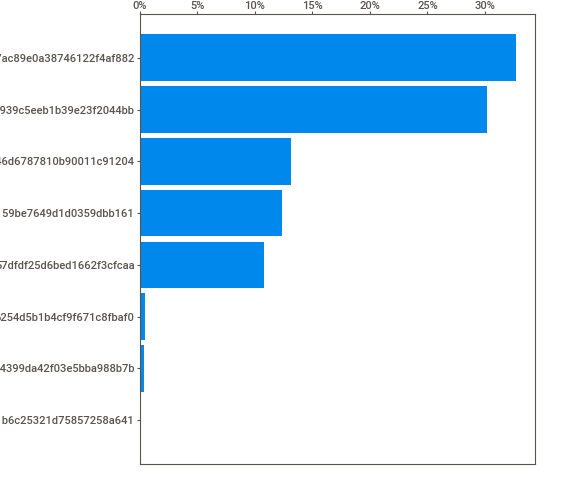
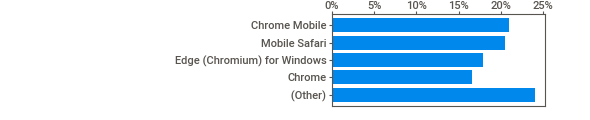
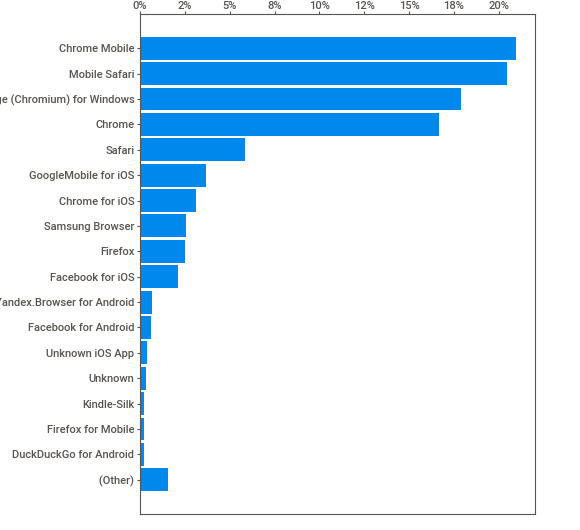
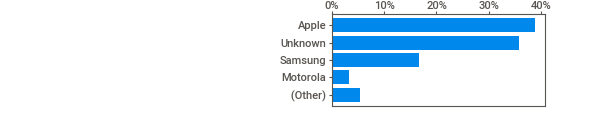
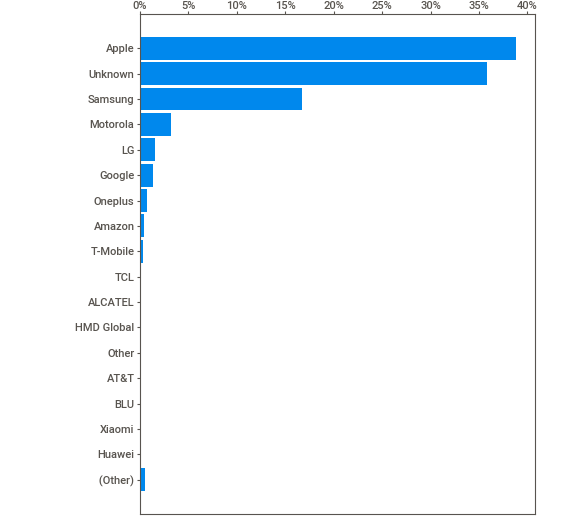
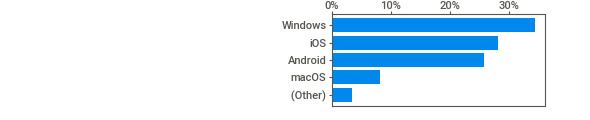
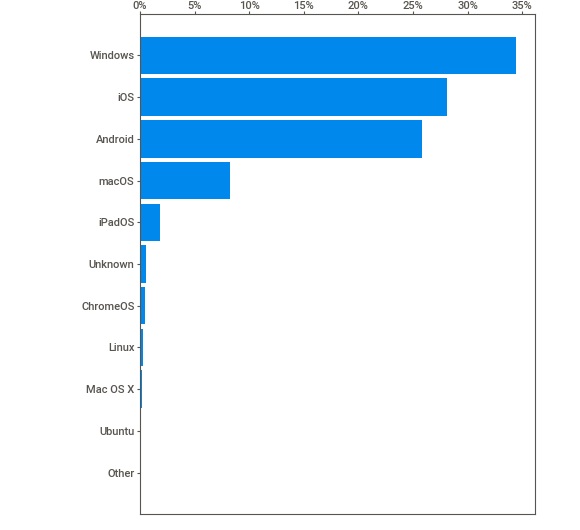
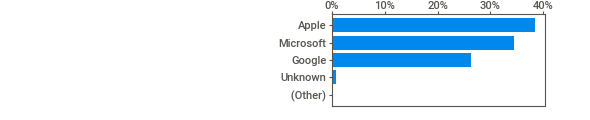
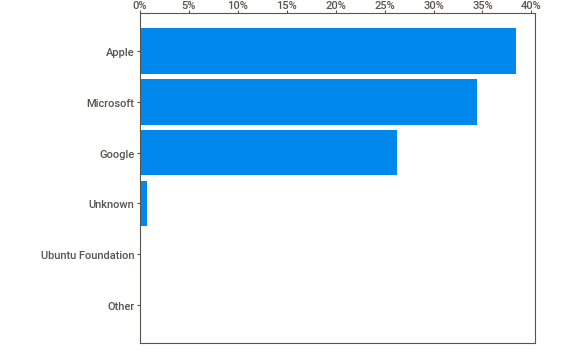
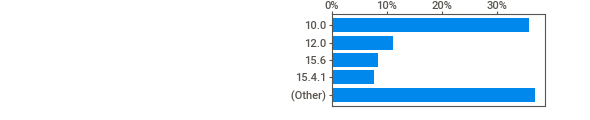
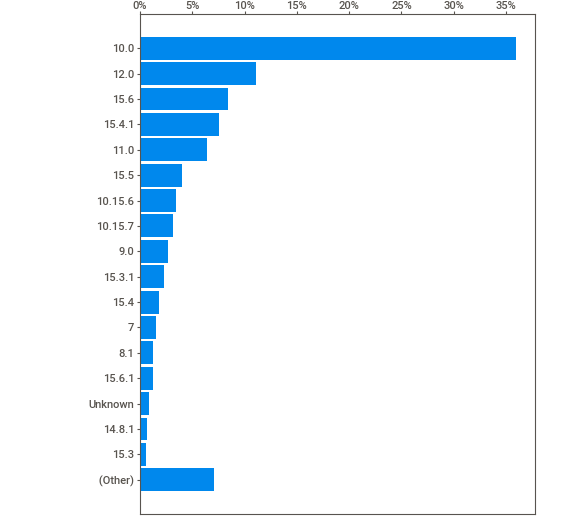
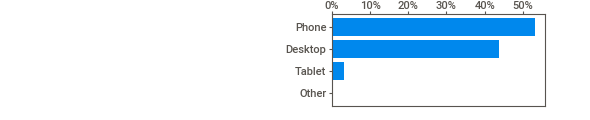
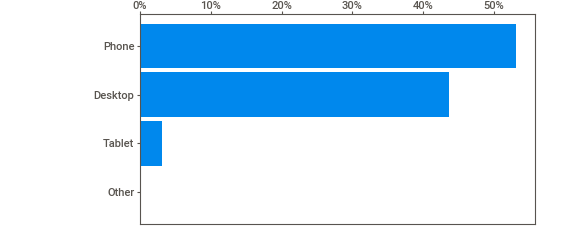
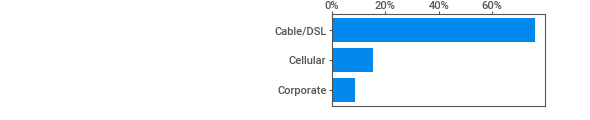
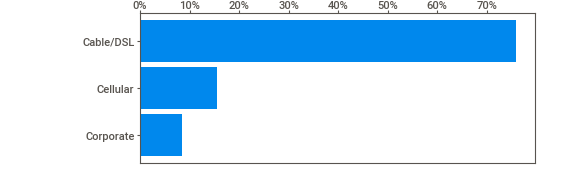
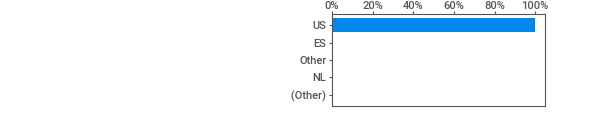
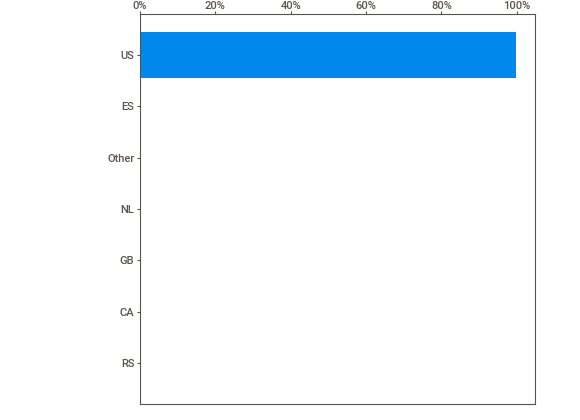
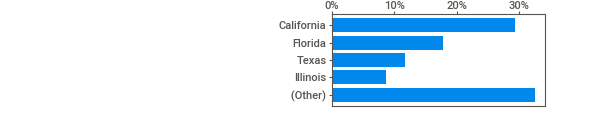
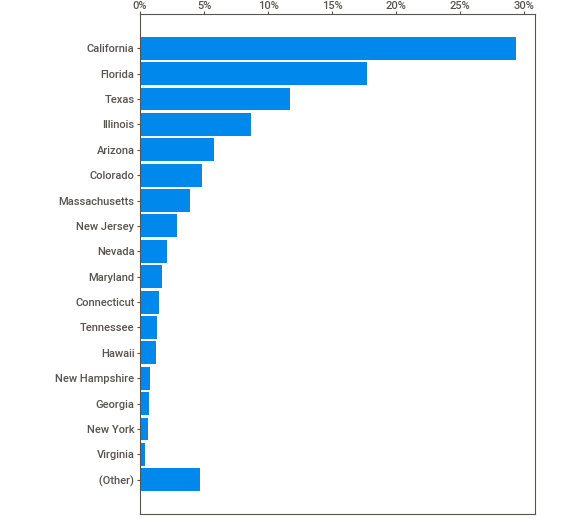
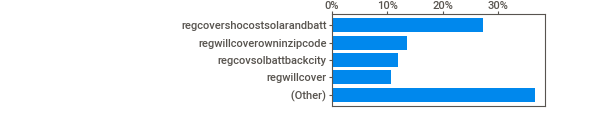
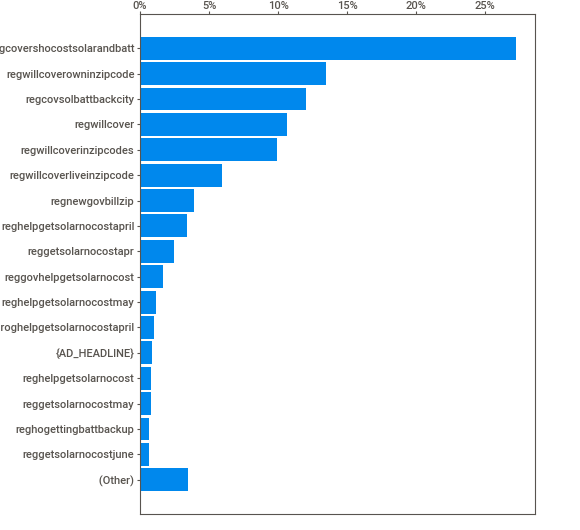
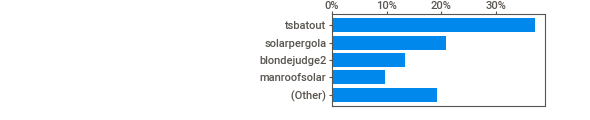
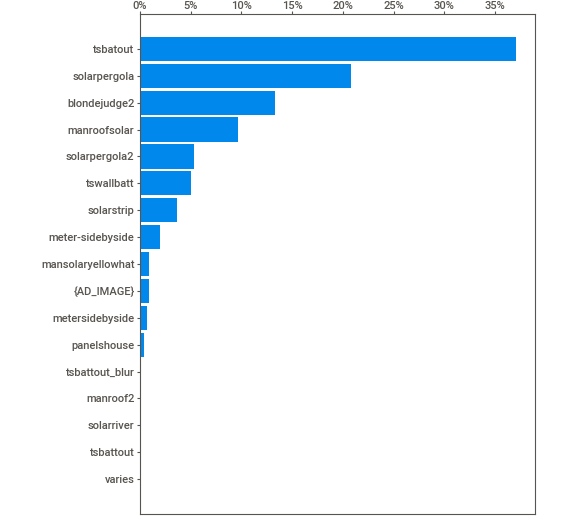
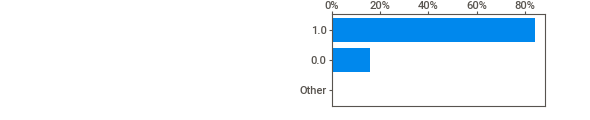
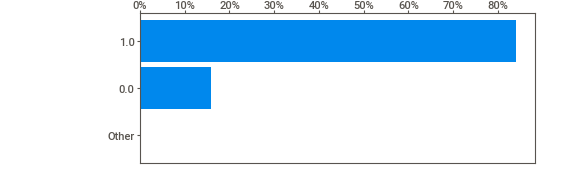
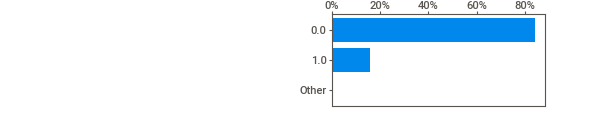
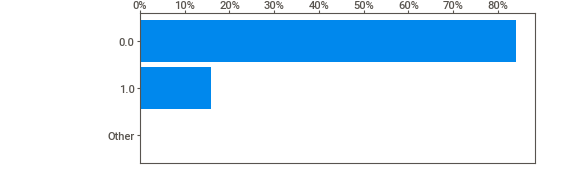
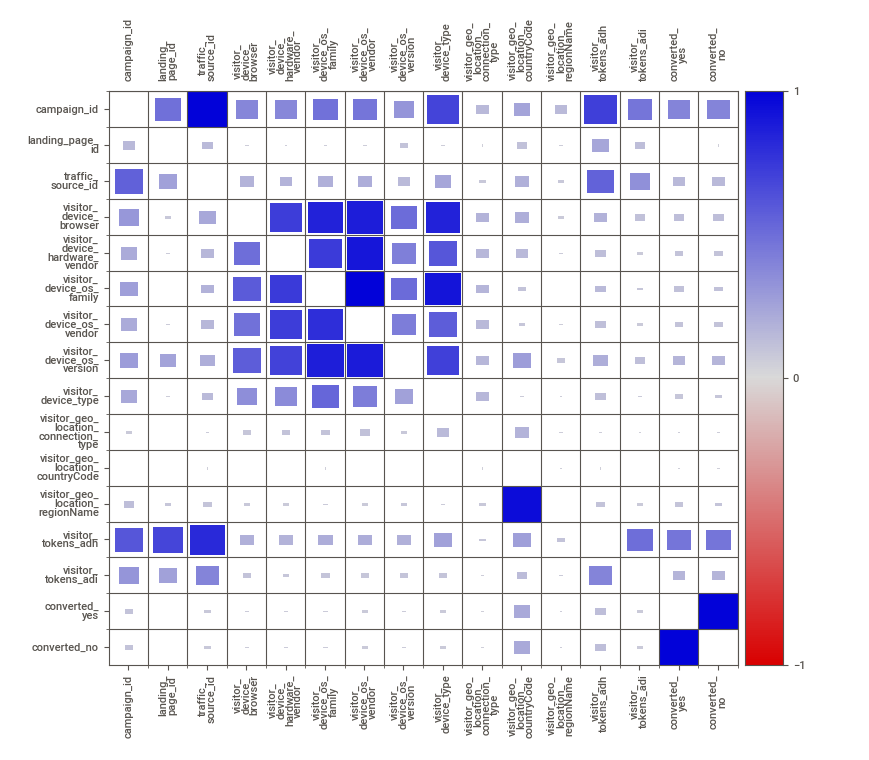
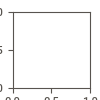

In [27]:
# Se muestra la salida
sweet_report.show_notebook()

In [28]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_countryCode        0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
converted_yes                           0
visitor_device_type                     0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
visitor_device_os_version               0
converted_no                            0
dtype: int64

In [29]:
df.shape

(18405, 21)

In [ ]:
#df = df.drop_duplicates()

In [30]:
df = df.query("campaign_id != 'Other'")
df = df.query("visitor_device_browser != 'Other'")
df = df.query("visitor_device_browser != 'Other'")
df = df.query("visitor_device_hardware_family != 'Other'")
df = df.query("visitor_device_hardware_model != 'Other'")
df = df.query("visitor_device_hardware_vendor != 'Other'")
df = df.query("visitor_device_os_family != 'Other'")
df = df.query("visitor_device_os_version != 'Other'")
df = df.query("visitor_geo_location_cityName != 'Other'")
df = df.query("visitor_geo_location_countryCode != 'Other'")
df = df.query("visitor_geo_location_isp != 'Other'")
df = df.query("visitor_geo_location_regionName != 'Other'")
df = df.query("visitor_tokens_adh != 'Other'")
df = df.query("visitor_tokens_cadid != 'Other'")
df = df.query("visitor_tokens_adi != 'Other'")
#model_data1 = model_data1.query("visitor_tokens_add != 'Other'")

In [31]:
encoder=preprocessing.LabelEncoder()

encoder_dict =defaultdict(LabelEncoder)
labeled_df = df.apply(lambda x: encoder_dict[x.name].fit_transform(x))
#labeled_df = df.apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [32]:
labeled_df

,campaign_id,landing_page_id,traffic_source_id,visitor_device_browser,visitor_device_hardware_family,visitor_device_hardware_model,visitor_device_hardware_vendor,visitor_device_os_family,visitor_device_os_vendor,visitor_device_os_version,...,visitor_geo_location_cityName,visitor_geo_location_connection_type,visitor_geo_location_countryCode,visitor_geo_location_isp,visitor_geo_location_regionName,visitor_tokens_adh,visitor_tokens_cadid,visitor_tokens_adi,converted_yes,converted_no
1,7,0,2,3,26,328,24,6,2,0,...,691,0,5,2,3,12,71,7,0,1
2,3,0,2,32,167,97,3,9,0,15,...,39,0,5,63,13,26,68,8,0,1
3,2,0,2,27,263,354,3,7,0,61,...,809,1,5,301,0,7,193,8,0,1
4,2,0,2,45,71,237,18,0,1,81,...,963,0,5,63,9,14,219,7,0,1
5,1,0,2,20,263,354,3,7,0,60,...,466,0,5,63,4,12,58,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18399,15,1,2,3,167,97,3,9,0,12,...,54,2,5,13,47,29,66,7,0,1
18401,9,1,0,27,263,354,3,7,0,65,...,1285,2,5,13,3,30,124,0,0,1
18402,39,1,4,27,263,354,3,7,0,65,...,1133,0,5,63,29,6,8,11,0,1
18403,41,1,4,27,263,354,3,7,0,65,...,1123,0,5,63,13,6,8,11,0,1


In [33]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no'],
      dtype='object')

In [34]:
X = labeled_df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no']]

In [35]:
#salidas

y=labeled_df[["landing_page_id"]]

In [36]:
#scaler

X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2115
           1       0.99      0.92      0.95      2081

    accuracy                           0.95      4196
   macro avg       0.96      0.95      0.95      4196
weighted avg       0.96      0.95      0.95      4196



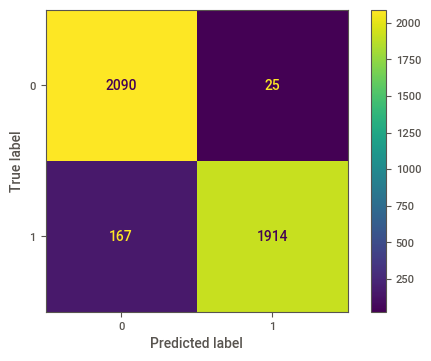

In [37]:
# red neural

mlp=MLPClassifier(hidden_layer_sizes=(7,7,7), max_iter=200, solver='adam', random_state=1, tol=0.000000001)
#mlp=MLPClassifier(hidden_layer_sizes=(6,6,6), max_iter=100)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
print (classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

# Aplicando una Red Neuronal Secuencial

In [38]:
# example of learned embedding encoding for a neural network
from numpy import unique
import numpy
from numpy import array
import pandas as pd
import datetime 
from time import sleep
from tqdm import tqdm
import os
from pandas import read_csv
from sklearn.model_selection import train_test_split
import json
import tensorflow as tf
from tensorflow import keras
import requests
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1
from keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras.utils.vis_utils import plot_model
from tensorflow import keras
from keras.models import Sequential
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#from predict import model 

In [39]:
# carga los datos
df = pd.read_excel('62f1ab79cc287b001f643389_clear.xlsx') 

In [40]:
df.shape

(18405, 21)

In [41]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_countryCode        0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
converted_yes                           0
visitor_device_type                     0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
visitor_device_os_version               0
converted_no                            0
dtype: int64

In [ ]:
#df = df.drop_duplicates()

In [42]:
df = df.query("campaign_id != 'Other'")
df = df.query("visitor_device_browser != 'Other'")
df = df.query("visitor_device_browser != 'Other'")
df = df.query("visitor_device_hardware_family != 'Other'")
df = df.query("visitor_device_hardware_model != 'Other'")
df = df.query("visitor_device_hardware_vendor != 'Other'")
df = df.query("visitor_device_os_family != 'Other'")
df = df.query("visitor_device_os_version != 'Other'")
df = df.query("visitor_geo_location_cityName != 'Other'")
df = df.query("visitor_geo_location_countryCode != 'Other'")
df = df.query("visitor_geo_location_isp != 'Other'")
df = df.query("visitor_geo_location_regionName != 'Other'")
df = df.query("visitor_tokens_adh != 'Other'")
df = df.query("visitor_tokens_cadid != 'Other'")
df = df.query("visitor_tokens_adi != 'Other'")
#model_data1 = model_data1.query("visitor_tokens_add != 'Other'")

In [43]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no'],
      dtype='object')

In [44]:
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no']]

In [45]:
X = X.astype(str).to_numpy()

In [46]:
y = df[["landing_page_id"]].to_numpy()

In [47]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)
#onehot_encoder = OneHotEncoder(sparse=False, categories='auto')

X shape: :  (16781, 3249)


In [48]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=0.30, random_state=123)

In [50]:
# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(500, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.3))
    model.add(Dense(100, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.3))  
    model.add(Dense(1, kernel_initializer= 'he_uniform',
                activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [51]:
model = modelo_mlp()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1625000   
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [52]:
# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/20
235/235 [==============================] - 6s 21ms/step - loss: 0.1521 - accuracy: 0.9415 - val_loss: 0.0724 - val_accuracy: 0.9718
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0588 - accuracy: 0.9799 - val_loss: 0.0772 - val_accuracy: 0.9736
Epoch 3/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0807 - val_accuracy: 0.9722
Epoch 4/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.0885 - val_accuracy: 0.9728
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0926 - val_accuracy: 0.9712
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.1031 - val_accuracy: 0.9710
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.1125 - val_accuracy: 0.9712

In [53]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

Precisión Entrenamiento: 0.9983
Precisión Prueba:  0.9720


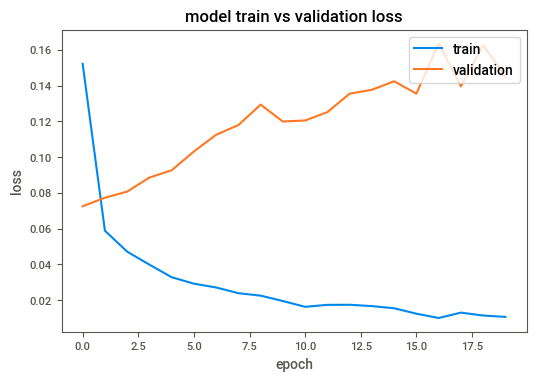

In [54]:
from matplotlib import pyplot
from numpy import array
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [55]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [56]:
from sklearn.metrics import confusion_matrix
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[2424   38]
 [ 103 2470]]


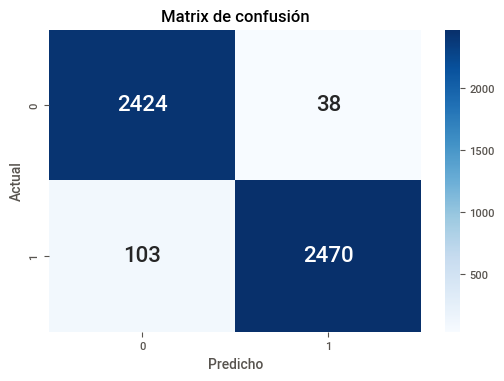

In [57]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Matrix de confusión")
sns.heatmap(matrix,annot=True,cmap="Blues",fmt="d",cbar=True, 
            annot_kws={"size": 16})
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()

In [58]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2462
           1       0.98      0.96      0.97      2573

    accuracy                           0.97      5035
   macro avg       0.97      0.97      0.97      5035
weighted avg       0.97      0.97      0.97      5035



In [59]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [60]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.971996


In [61]:
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.984848


In [62]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.972250


In [63]:
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.943997


In [64]:
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.972267


In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [66]:
y_pred = model.predict(X_test).ravel()
y_pred

array([5.8904290e-04, 9.9879950e-01, 9.3251274e-06, ..., 1.0000000e+00,
       6.3958832e-06, 9.9995416e-01], dtype=float32)

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

NameError: ignored

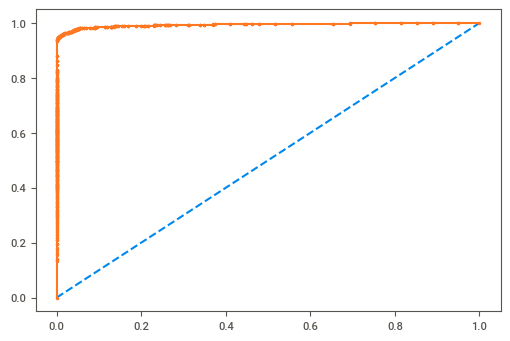

In [68]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Red Neuronal')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# Aplicando una Red Neuronal Ordinal Encoder

In [69]:
# carga los datos
df = pd.read_excel('62f1ab79cc287b001f643389_clear.xlsx') 

In [70]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_countryCode        0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
converted_yes                           0
visitor_device_type                     0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
visitor_device_os_version               0
converted_no                            0
dtype: int64

In [ ]:
#df = df.drop_duplicates()

In [71]:
df = df.query("campaign_id != 'Other'")
df = df.query("visitor_device_browser != 'Other'")
df = df.query("visitor_device_browser != 'Other'")
df = df.query("visitor_device_hardware_family != 'Other'")
df = df.query("visitor_device_hardware_model != 'Other'")
df = df.query("visitor_device_hardware_vendor != 'Other'")
df = df.query("visitor_device_os_family != 'Other'")
df = df.query("visitor_device_os_version != 'Other'")
df = df.query("visitor_geo_location_cityName != 'Other'")
df = df.query("visitor_geo_location_countryCode != 'Other'")
df = df.query("visitor_geo_location_isp != 'Other'")
df = df.query("visitor_geo_location_regionName != 'Other'")
df = df.query("visitor_tokens_adh != 'Other'")
df = df.query("visitor_tokens_cadid != 'Other'")
df = df.query("visitor_tokens_adi != 'Other'")
#model_data1 = model_data1.query("visitor_tokens_add != 'Other'")

In [72]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no'],
      dtype='object')

In [73]:
df.shape

(16781, 21)

In [74]:
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no']]

In [75]:
X = X.astype(str).to_numpy()

In [76]:
y = df[["landing_page_id"]].to_numpy()

In [77]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OrdinalEncoder()
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)
#onehot_encoder = OneHotEncoder(sparse=False, categories='auto')

X shape: :  (16781, 20)


In [78]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=0.30, random_state=123)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

In [81]:
X_train

array([[-0.01885312,  0.07050726, -0.02871686, ...,  0.78445391,
         0.43084374, -0.43084374],
       [-0.73621218, -1.0554999 ,  1.67486001, ..., -1.30809619,
         0.43084374, -0.43084374],
       [-0.66447628, -1.0554999 ,  1.58519807, ..., -0.14556836,
         0.43084374, -0.43084374],
       ...,
       [-0.73621218, -1.0554999 , -0.92533626, ..., -0.14556836,
         0.43084374, -0.43084374],
       [-0.73621218, -1.0554999 , -0.92533626, ...,  0.78445391,
         0.43084374, -0.43084374],
       [-1.23836353,  0.07050726, -0.92533626, ..., -0.14556836,
         0.43084374, -0.43084374]])

In [82]:
# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l1(1e-4)))
    #model.add(Dropout(0.6))
    model.add(Dense(10, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    #model.add(Dropout(0.3))
    model.add(Dense(5, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    #model.add(Dropout(0.1))  
    model.add(Dense(1, kernel_initializer= 'he_uniform',
                activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [83]:
model = modelo_mlp()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                525       
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6697 - accuracy: 0.6278 - val_loss: 0.5236 - val_accuracy: 0.7887
Epoch 2/20
235/235 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8311 - val_loss: 0.3089 - val_accuracy: 0.8600
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8783 - val_loss: 0.2199 - val_accuracy: 0.8991
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1915 - accuracy: 0.9197 - val_loss: 0.1813 - val_accuracy: 0.9267
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1615 - accuracy: 0.9367 - val_loss: 0.1587 - val_accuracy: 0.9414
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1433 - accuracy: 0.9455 - val_loss: 0.1442 - val_accuracy: 0.9464
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1315 - accuracy: 0.9494 - val_loss: 0.1353 - val_accuracy: 0.9496
Epoch 

In [85]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

Precisión Entrenamiento: 0.9639
Precisión Prueba:  0.9559


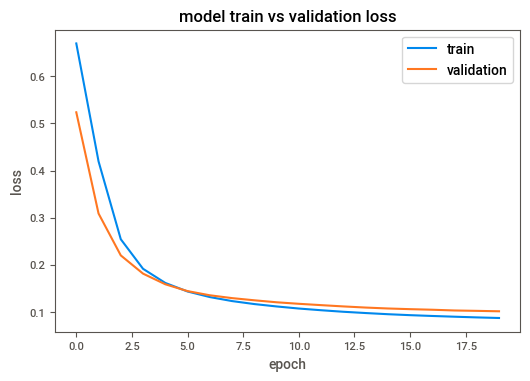

In [86]:
from matplotlib import pyplot
from numpy import array
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [87]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [88]:
from sklearn.metrics import confusion_matrix
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[2395   67]
 [ 155 2418]]


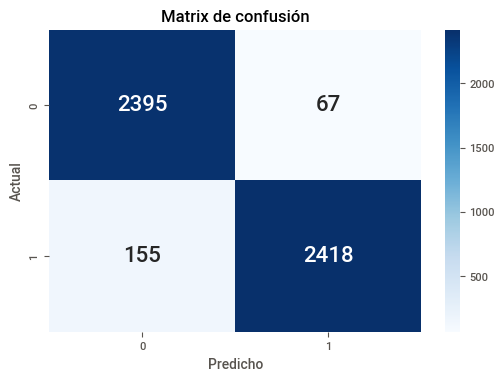

In [89]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Matrix de confusión")
sns.heatmap(matrix,annot=True,cmap="Blues",fmt="d",cbar=True, 
            annot_kws={"size": 16})
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()

In [90]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2462
           1       0.97      0.94      0.96      2573

    accuracy                           0.96      5035
   macro avg       0.96      0.96      0.96      5035
weighted avg       0.96      0.96      0.96      5035



In [91]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [92]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.955909


In [93]:
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.973038


In [94]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.956109


In [95]:
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.911842


In [96]:
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.956273


In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [98]:
y_pred = model.predict(X_test).ravel()
y_pred

array([0.3574168 , 1.        , 0.00439617, ..., 1.        , 0.02762914,
       1.        ], dtype=float32)

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

NameError: ignored

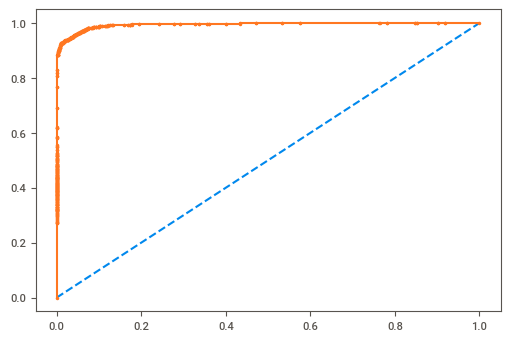

In [100]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Red Neuronal')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()